# Clean Data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')

In [3]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# remove all Incoive No start with C (C means it's cancelation)
df = df[df['InvoiceNo'].str[0] != 'C']

In [7]:
# delete all the row got quantity <= 0 
df = df[df['Quantity'] > 0 ]

In [8]:
df[df['UnitPrice']== df['UnitPrice'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [9]:
# I notice a handful of non-product related codes (‘Postage’, ‘Bank Charges’, ‘Gift Vouchers’, etc.).
non_product = ['AMAZONFEE', 'BANK CHARGES', 'C2', 'DCGSSBOY','DCGSSGIRL', 'DOT', 'gift_0001_', 'PADS', 'POST']
df = df[~df['StockCode'].isin(non_product)]


In [10]:
non_description = ["check", "check?", "?", "??", "damaged", "found", 
                   "adjustment", "Amazon", "AMAZON", "amazon adjust", 
                  "Amazon Adjustment", "amazon sales", "Found", "FOUND",
                  "found box", "Found by jackie ","Found in w/hse","dotcom", 
                  "dotcom adjust", "allocate stock for dotcom orders ta", "FBA", "Dotcomgiftshop Gift Voucher £100.00", "on cargo order",
                  "wrongly sold (22719) barcode", "wrongly marked 23343",
                  "dotcomstock", "rcvd be air temp fix for dotcom sit", 
                  "Manual", "John Lewis", "had been put aside", 
                  "for online retail orders", "taig adjust", "amazon", 
                  "incorrectly credited C550456 see 47", "returned", 
                  "wrongly coded 20713", "came coded as 20713", 
                  "add stock to allocate online orders", "Adjust bad debt", 
                  "alan hodge cant mamage this section", "website fixed",
                  "did  a credit  and did not tick ret", "michel oops",
                  "incorrectly credited C550456 see 47", "mailout", "test",
                  "Sale error",  "Lighthouse Trading zero invc incorr", "SAMPLES",
                  "Marked as 23343", "wrongly coded 23343","Adjustment", 
                  "rcvd be air temp fix for dotcom sit", "Had been put aside."]
df = df[~df['Description'].isin(non_description)]

In [11]:
# remove all desciption that is null
df = df[df['Description'].notna()]

In [12]:
# There is still a significant number of NAs in CustomerID, which I will leave as they are.
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom


In [13]:
# change type of Invoice Date from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
# drop duplicate
df = df.drop_duplicates()

In [15]:
# make new column name Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [17]:
print(df['InvoiceDate'].max())
print(df['InvoiceDate'].min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [18]:
df = df[df['InvoiceDate']< pd.to_datetime('2011-12-01')]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498198 entries, 0 to 516368
Data columns (total 9 columns):
InvoiceNo      498198 non-null object
StockCode      498198 non-null object
Description    498198 non-null object
Quantity       498198 non-null int64
InvoiceDate    498198 non-null datetime64[ns]
UnitPrice      498198 non-null float64
CustomerID     374219 non-null float64
Country        498198 non-null object
Revenue        498198 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.0+ MB


In [19]:
def check_country(row):
  if row['Country'] in ['United Kingdom', 'EIRE', 'Germany','France','Netherlands']:
    return row['Country']
  else:
    return 'Other Country'

In [20]:
df['Country2'] = df.apply(check_country, axis =1)

In [21]:
df['Country2'].unique()

array(['United Kingdom', 'France', 'Other Country', 'Netherlands',
       'Germany', 'EIRE'], dtype=object)

In [22]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Country2,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12


In [24]:
df['MinYearMonth'] = df.groupby('CustomerID')['YearMonth'].transform('min')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498198 entries, 0 to 516368
Data columns (total 12 columns):
InvoiceNo       498198 non-null object
StockCode       498198 non-null object
Description     498198 non-null object
Quantity        498198 non-null int64
InvoiceDate     498198 non-null datetime64[ns]
UnitPrice       498198 non-null float64
CustomerID      374219 non-null float64
Country         498198 non-null object
Revenue         498198 non-null float64
Country2        498198 non-null object
YearMonth       498198 non-null object
MinYearMonth    374219 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 49.4+ MB


In [26]:
df['CohortIndex'] = 12* (df['YearMonth'].dt.year - df['MinYearMonth'].dt.year ) + (df['YearMonth'].dt.month - df['MinYearMonth'].dt.month )

In [27]:
df['CohortIndex'] = df['CohortIndex'].astype(int)

In [28]:
df['CohortIndex'].unique()

array([    0, 24145,     1, 24146,     2, 24147,     3, 24148,     4,
       24149,     5, 24150,     6, 24151,     7, 24152,     8, 24153,
           9, 24154,    10, 24155,    11, 24156], dtype=int64)

In [29]:
def check_cohort(row):
	if row['CohortIndex'] > 12:
		return float("nan")
	else:
		return row['CohortIndex']

In [30]:
df['CohortIndex'] = df.apply(check_cohort, axis = 1)

In [82]:
df.to_csv('df.csv', index = False)

# Question about country?
- Which country spent and buy the most orders?
- What is the average value per order of each country?
- Country Cohort Analysis?

In [31]:
InvoiceCount = df.groupby(['Country2','YearMonth'])['InvoiceNo'].nunique().reset_index()

In [32]:
CustomerCount = df.groupby(['Country2','YearMonth'])['CustomerID'].nunique().reset_index()

In [33]:
RevQuanbyCountry = df.groupby(['Country2','YearMonth']).agg({'Revenue': 'sum',
															'Quantity': 'sum',
															})

In [34]:
Country = pd.merge(InvoiceCount,CustomerCount, how = 'inner', on = ['Country2', 'YearMonth'] )
Country = pd.merge(Country,RevQuanbyCountry, how = 'inner', on = ['Country2', 'YearMonth'] )
Country.rename(columns={'InvoiceNo': 'InvoiceCount', 'CustomerID': 'CustomerCount'}, inplace = True)
Country.head()

,Country2,YearMonth,InvoiceCount,CustomerCount,Revenue,Quantity
0,EIRE,2010-12,17,3,9683.26,5773
1,EIRE,2011-01,7,2,21704.19,8790
2,EIRE,2011-02,13,2,12038.74,5964
3,EIRE,2011-03,21,3,18323.17,9568
4,EIRE,2011-04,11,2,7270.50,4129


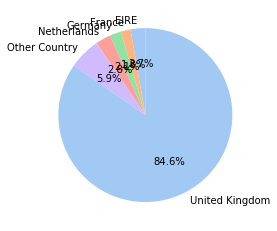

In [35]:
plt.pie(Country.groupby("Country2")['Revenue'].sum().values, 
        labels=Country.groupby("Country2")['Revenue'].sum().index,
        autopct='%1.1f%%',
        colors = sns.color_palette('pastel')[0:5],
        startangle=90)
plt.show()

In [36]:
def get_cohort_matrix(data = df, var='CustomerID', fun=pd.Series.nunique, idx = 'MinYearMonth', col =  'CohortIndex'):

    cd = data.groupby([idx, col])[var].apply(fun).reset_index()

    cc = cd.pivot_table(index = idx,

                        columns = col,

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(2)
    return cc, cs, retention

In [37]:
cc_rev, cs_rev, ret_rev = get_cohort_matrix( df, var='Revenue', fun=pd.Series.sum, idx = 'Country2', col = 'YearMonth')
ret_rev

YearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
Country2,,,,,,,,,,,,
EIRE,1.0,2.24,1.24,1.89,0.75,1.83,2.14,4.36,1.86,4.37,2.46,3.08
France,1.0,1.90,0.90,1.60,0.46,1.90,1.75,1.08,1.48,2.57,2.81,3.42
Germany,1.0,1.16,0.67,0.97,0.83,1.77,0.91,1.11,1.33,1.25,2.15,1.83
Netherlands,1.0,3.04,2.61,2.54,0.33,3.31,3.06,0.00,4.61,3.06,4.61,2.93
Other Country,1.0,1.48,1.28,1.70,0.83,1.17,1.92,1.49,1.88,1.48,2.49,2.07
United Kingdom,1.0,0.77,0.59,0.81,0.66,0.88,0.86,0.82,0.82,1.24,1.29,1.82


In [87]:
ret_rev.to_csv('ret_rev.csv')

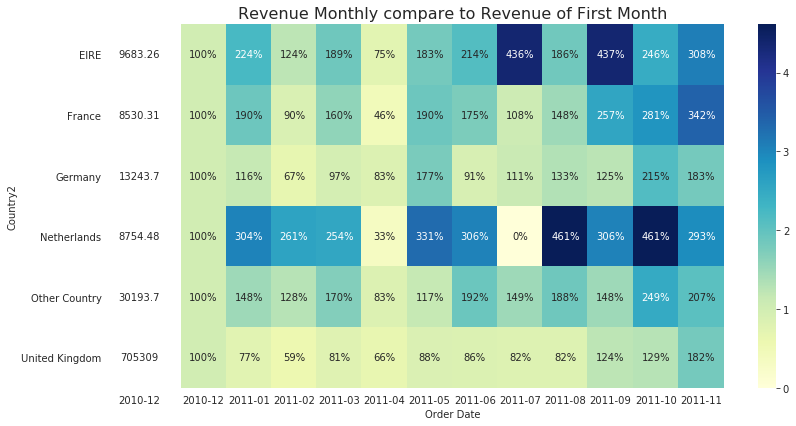

In [38]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(ret_rev, 
                mask=ret_rev.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='YlGnBu', 
                ax=ax[1])
    ax[1].set_title('Revenue Monthly compare to Revenue of First Month', fontsize=16)
    ax[1].set(xlabel='Order Date',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cs_rev).rename(columns={1: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# What are some important trends visible in the sales data and insights ? 

*   Do customers tend to buy more on certain weekday?
*   Do customers buy more at the start of the month?
* Do customers tend to buy more at a specific hour of the day?

## WEEK

In [208]:
week = df.groupby(df['InvoiceDate'].dt.weekday)[['Revenue','Quantity']].sum().reset_index()

In [209]:
week

,InvoiceDate,Revenue,Quantity
0,0,1602946.94,825467
1,1,2029689.14,1080427
2,2,1709571.38,981329
3,3,2003562.81,1145023
4,4,1513192.56,780157
5,6,774068.03,452760


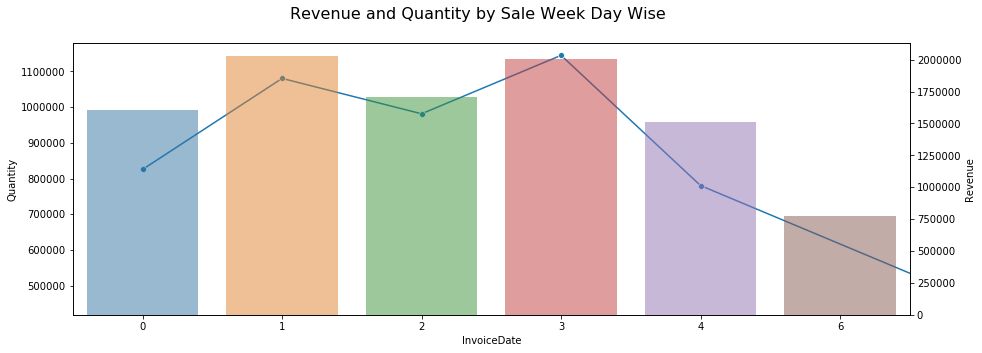

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.lineplot(data = week, x = week.InvoiceDate, y = 'Quantity', marker = 'o', sort =  False, ax = ax)
ax2 = ax.twinx()
sns.barplot(data = week, x = week.InvoiceDate, y='Revenue', alpha=0.5, ax=ax2)
fig.suptitle('Revenue and Quantity by Sale Week Day Wise', fontsize=16)
plt.show()

It is interesting to note that Thursdays have the maximum sale by volume and as well as revenue.
Also, there are no transactions done on Saturdays. It is safe to assume that the store is closed on Saturdays.
Nearly, 42% of total sale is done on Thursdays and Tuesdays

## HOUR

In [211]:
hour = df.groupby(df['InvoiceDate'].dt.hour)[['Revenue','Quantity']].sum().reset_index()

In [212]:
hour

,InvoiceDate,Revenue,Quantity
0,6,4.25,1
1,7,30469.21,15360
2,8,266212.81,150790
3,9,754540.59,420129
4,10,1340259.82,785151
5,11,1150932.76,647743
6,12,1344393.30,799006
7,13,1176240.06,672394
8,14,1078126.08,573450
9,15,1233870.60,611518


Text(0.5, 1.0, 'Revenue and No. of Item Sold each hour')

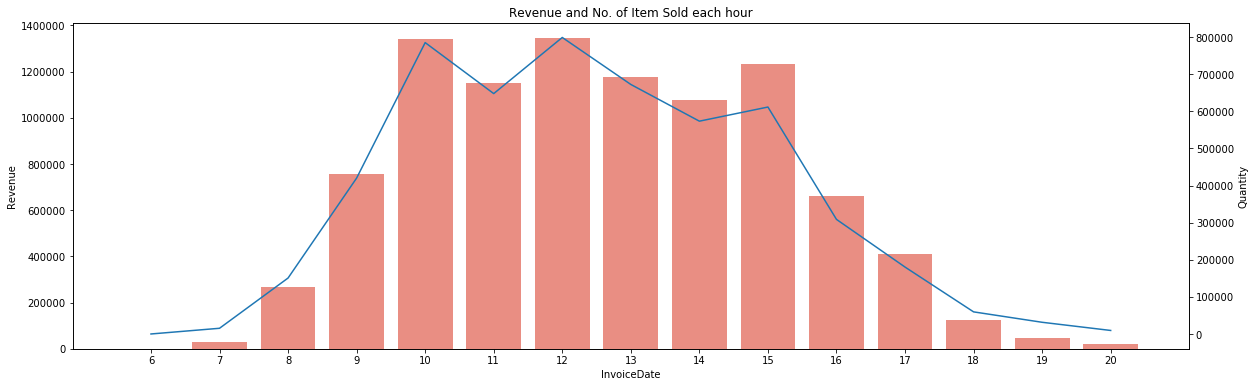

In [213]:
plt.figure(figsize = (20,6))
sns.barplot(data = hour, x= 'InvoiceDate', y='Revenue', color = 'salmon')
plt.twinx()
sns.lineplot(data = hour, x= hour['InvoiceDate'].astype(str), y='Quantity')
plt.title('Revenue and No. of Item Sold each hour')

We can see that the customers do tend to buy between 9:00 hrs - 13:00 hrs. Infact, ~51 % of the sales by revenue is done in these hours

Also, there are no transactions are done before 6:00 hrs and after 20:00 hrs. It can be assumed that the store usually opens for 14 hours between 6:00 hrs and 20:00 hrs.

## DATE

In [214]:
date = df.groupby(df['InvoiceDate'].dt.day)[['Revenue','Quantity']].sum().reset_index()

In [215]:
date.head()

,InvoiceDate,Revenue,Quantity
0,1,261182.09,151466
1,2,240700.97,135073
2,3,311685.37,156850
3,4,345271.39,194291
4,5,315804.31,185987


Text(0.5, 1.0, 'Revenue and No. of Item Sold each day of month')

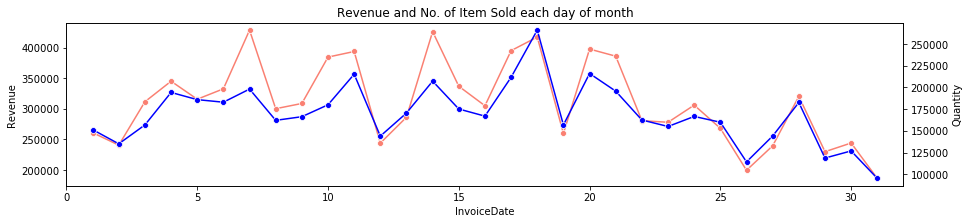

In [216]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,3))
sns.lineplot(data = date, x='InvoiceDate', y='Revenue', marker='o', sort = False, ax=ax, color = 'salmon')
plt.xlim(0,32)
ax2 = ax.twinx()
sns.lineplot(data = date, x='InvoiceDate', y='Quantity', marker='o', sort = False, ax=ax2, color = 'blue')
plt.xlim(0,32)
plt.title('Revenue and No. of Item Sold each day of month')

## MONTH_YEAR

In [26]:
month = df.groupby('YearMonth')[['Revenue','Quantity']].agg({'Revenue': 'sum',
															'Quantity': 'sum',
															'InvoiceNo': 'count'}).reset_index()

C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [27]:
month['Revenue'].sum()

9633030.859999843

In [30]:
month.rename(columns = {'InvoiceNo': 'TransactionCount'}, inplace = True)

Text(0.5, 1.0, 'Revenue and No. of Item Sold by Months')

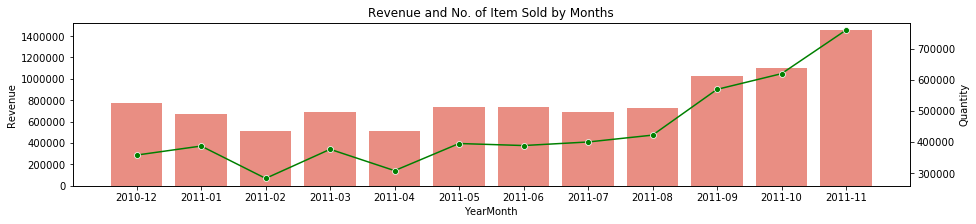

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,3))
sns.barplot(data = month, x=month['YearMonth'].astype(str), y='Revenue', color = 'salmon')
ax2 = ax.twinx()
sns.lineplot(data = month, x=month['YearMonth'].astype(str), y='Quantity', marker='o', sort = False, ax=ax2, color = 'green')
plt.title("Revenue and No. of Item Sold by Months")

In [33]:
invoice = df.groupby(['YearMonth','InvoiceNo'])['Country'].count().reset_index().groupby('YearMonth')['InvoiceNo'].count().reset_index()

In [34]:
invoice.rename(columns = {'InvoiceNo': 'InvoiceCount'}, inplace = True)

In [35]:
month = pd.merge(month, invoice, how = 'inner', on = 'YearMonth')

In [36]:
month 

,YearMonth,Revenue,Quantity,TransactionCount,InvoiceCount
0,2010-12,775714.95,357801,40959,1552
1,2011-01,670439.46,386798,33915,1081
2,2011-02,507850.09,282732,26795,1096
3,2011-03,689716.82,376387,35330,1441
4,2011-04,515463.08,307657,28747,1235
5,2011-05,740000.14,394950,35811,1672
6,2011-06,737683.99,388429,35553,1528
7,2011-07,688178.12,399874,38198,1453
8,2011-08,724205.09,421937,34145,1342
9,2011-09,1028338.80,569159,48697,1818


In [37]:
month['AverageValueOfInvoice'] = month['Revenue']/month['InvoiceCount']

Text(0.5, 1.0, 'Invoice Count & AverageValueOfInvoice by Months')

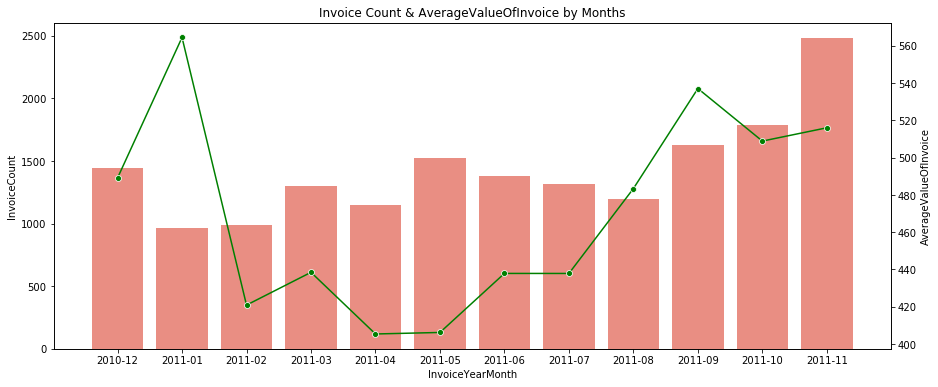

In [217]:
plt.figure(figsize = (15,6))
sns.barplot(data = month, x = 'InvoiceYearMonth', y = 'InvoiceCount', color = 'salmon')

plt.twinx()
sns.lineplot(data = month, x = month['InvoiceYearMonth'].astype(str), y = 'AverageValueOfInvoice', marker = 'o', color = 'green')
plt.title('Invoice Count & AverageValueOfInvoice by Months')

In [137]:
month.to_csv('month.csv', index = False)

# Question about customers?
*   Total Customer each month?
*   New Customer by time?
* Revenue Made By New vs Existing Users
* Monthly Retention Rate



## Customer by Time & New Customer by time

In [39]:
# Create a new column called 'UserType'. 
# If InvoiceYearMonth > MinPurchaseYearMonth then UserType is 'Existing' (because they already made purchase before)
# Otherwise, it is 'New'.
def check_already_purchase(row):
  if row['YearMonth'] > row['MinYearMonth']: 
    return 'Existing'
  else:
    return 'New'

In [86]:
df.groupby('YearMonth')['CustomerID'].nunique()

YearMonth
2010-12     884
2011-01     739
2011-02     757
2011-03     973
2011-04     853
2011-05    1054
2011-06     990
2011-07     946
2011-08     933
2011-09    1259
2011-10    1361
2011-11    1661
Freq: M, Name: CustomerID, dtype: int64

In [40]:
df_new = df[df['MinYearMonth'].notna()]

In [41]:
df_new['UserType'] = df_new.apply(check_already_purchase, axis = 1)

C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Country2,YearMonth,MinYearMonth,CohortIndex,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,United Kingdom,2010-12,2010-12,0.0,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12,2010-12,0.0,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,United Kingdom,2010-12,2010-12,0.0,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12,2010-12,0.0,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom,2010-12,2010-12,0.0,New


In [43]:
new_customer_by_time = df_new[df_new['UserType'] == 'New'].groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
existing_customer_by_time = df_new[df_new['UserType'] == 'Existing'].groupby(['YearMonth'])['CustomerID'].nunique().reset_index()

In [44]:
new_customer_by_time.rename(columns = {'CustomerID': 'NewCustomer'}, inplace = True)
existing_customer_by_time.rename(columns = {'CustomerID': 'ExistingCustomer'}, inplace = True)
new_customer_by_time.head()

,YearMonth,NewCustomer
0,2010-12,884
1,2011-01,416
2,2011-02,380
3,2011-03,452
4,2011-04,300


In [45]:
customer_by_time = pd.merge(new_customer_by_time, existing_customer_by_time, how = 'left', on = 'YearMonth' )

In [46]:
customer_by_time = customer_by_time.fillna(0)

In [47]:
customer_by_time['Ratio'] = customer_by_time['NewCustomer'] / (customer_by_time['NewCustomer'] + customer_by_time['ExistingCustomer'] )

In [48]:
customer_by_time['TotalCustomer'] = customer_by_time['NewCustomer'] + customer_by_time['ExistingCustomer']

In [49]:
customer_by_time.head()

,YearMonth,NewCustomer,ExistingCustomer,Ratio,TotalCustomer
0,2010-12,884,0.0,1.000000,884.0
1,2011-01,416,323.0,0.562923,739.0
2,2011-02,380,377.0,0.501982,757.0
3,2011-03,452,521.0,0.464543,973.0
4,2011-04,300,553.0,0.351700,853.0


In [83]:
customer_by_time.to_csv('customer_by_time.csv', index = False)

## Revenue Made By New vs Existing Users

In [51]:
revenue_by_customer = df_new.groupby(['UserType','YearMonth']).agg({'Revenue': 'sum',
																	'InvoiceNo': 'count'}).reset_index()

In [52]:
new_customer = revenue_by_customer[revenue_by_customer['UserType'] == 'New']
existing_customer = revenue_by_customer[revenue_by_customer['UserType'] == 'Existing']

In [53]:
revenue_by_customer = pd.merge(new_customer, existing_customer, how = 'left', on = 'YearMonth')

In [54]:
revenue_by_customer = revenue_by_customer.fillna(0)

In [55]:
revenue_by_customer['Ratio'] = revenue_by_customer['Revenue_x']/ (revenue_by_customer['Revenue_y']+ revenue_by_customer['Revenue_x'])

In [56]:
revenue_by_customer

,UserType_x,YearMonth,Revenue_x,InvoiceNo_x,UserType_y,Revenue_y,InvoiceNo_y,Ratio
0,New,2010-12,565199.56,25572,0,0.00,0.0,1.000000
1,New,2011-01,289033.29,10823,Existing,273649.62,10076.0,0.513670
2,New,2011-02,157250.05,8796,Existing,285043.54,10835.0,0.355533
3,New,2011-03,196766.83,11314,Existing,386377.02,15438.0,0.337424
4,New,2011-04,119956.15,7156,Existing,334484.73,15191.0,0.263964
5,New,2011-05,118577.90,6017,Existing,540664.59,21945.0,0.179870
6,New,2011-06,133588.03,5621,Existing,519676.89,21199.0,0.204493
7,New,2011-07,72399.78,4918,Existing,519204.01,21558.0,0.122379
8,New,2011-08,78467.02,4797,Existing,557047.36,21891.0,0.123470
9,New,2011-09,151709.77,8212,Existing,787042.86,31298.0,0.161608


## Customer Retention & Customer Retention Rate

In [57]:
customer_retention, cs, customer_retention_rate = get_cohort_matrix(data = df_new, var='CustomerID', fun=pd.Series.nunique, idx = 'MinYearMonth', col = 'CohortIndex')

[Text(141.0, 0.5, 'First Order Date'), Text(0.5, 33.0, 'Month to retention')]

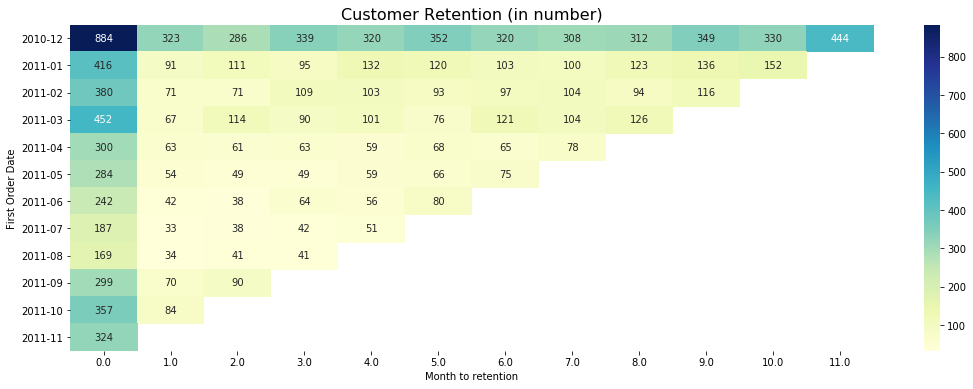

In [58]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
# retention matrix
sns.heatmap(customer_retention, 
                mask=customer_retention.isnull(), 
                annot=True, 
                fmt= '.0f',
                cmap='YlGnBu', 
                ax=ax)
ax.set_title('Customer Retention (in number)', fontsize=16)
ax.set(xlabel='Month to retention', ylabel = 'First Order Date' )

[Text(141.0, 0.5, 'First Order Date'), Text(0.5, 33.0, 'Month to retention')]

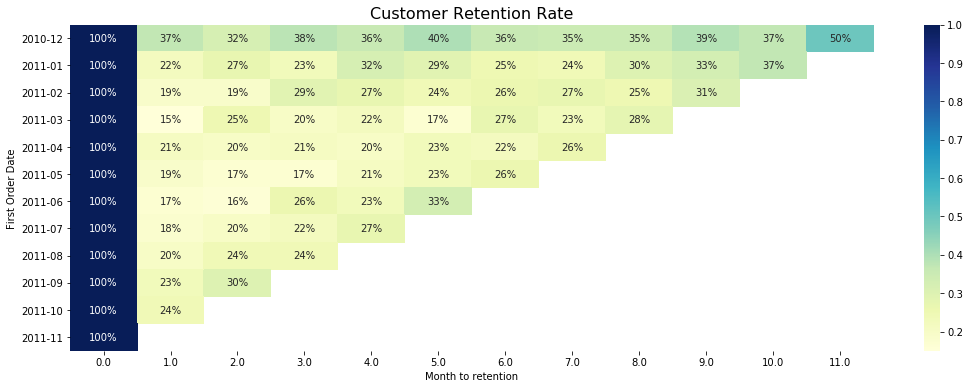

In [59]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
# retention matrix
sns.heatmap(customer_retention_rate, 
                mask=customer_retention_rate.isnull(), 
                annot=True, 
                fmt= '.0%',
                cmap='YlGnBu', 
                ax=ax)
ax.set_title('Customer Retention Rate', fontsize=16)
ax.set(xlabel='Month to retention', ylabel = 'First Order Date' )

## Revenue Contribution by First Order Date

In [60]:
rev, rev_cs, rev_ret = get_cohort_matrix(data = df_new, var='Revenue', fun=pd.Series.sum, idx = 'MinYearMonth', col = 'CohortIndex')

In [61]:
rev

CohortIndex,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
MinYearMonth,,,,,,,,,,,,
2010-12,565199.56,273649.62,231914.88,296401.62,201987.73,325803.34,310940.33,307416.63,326386.60,469383.10,448862.58,506896.88
2011-01,289033.29,53128.66,62412.06,64893.30,79925.57,83209.67,69548.35,71356.15,71387.69,104419.21,121637.82,NaN
2011-02,157250.05,27563.34,38885.66,48018.94,39916.17,33845.77,49570.91,60449.65,55007.61,64157.86,NaN,NaN
2011-03,196766.83,28718.04,58371.70,42366.69,50244.76,39776.33,64531.35,68641.55,70445.83,NaN,NaN,NaN
2011-04,119956.15,28545.04,24750.89,24104.79,26091.16,29370.44,28202.57,33671.61,NaN,NaN,NaN,NaN
2011-05,118577.90,18493.14,19965.61,19010.17,27594.54,32341.84,32813.34,NaN,NaN,NaN,NaN,NaN
2011-06,133588.03,14078.10,13318.37,30195.77,26152.56,40028.77,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,72399.78,11537.67,14998.39,17214.93,18637.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,78467.02,19131.93,31660.22,38919.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


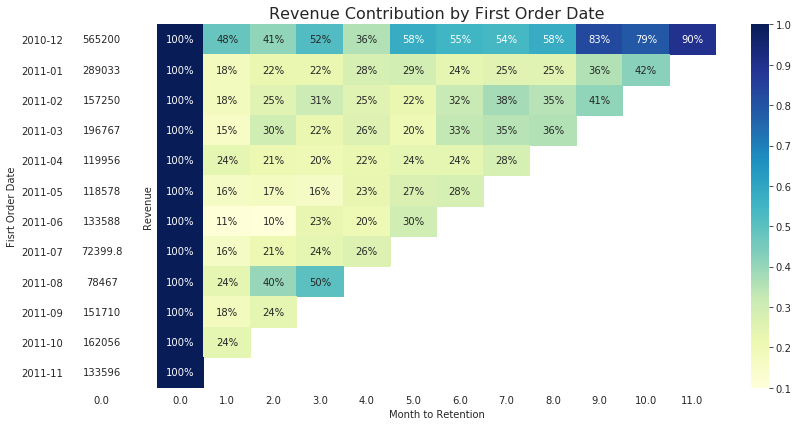

In [62]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(rev_ret, 
                mask=rev_ret.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='YlGnBu', 
                ax=ax[1])
    ax[1].set_title('Revenue Contribution by First Order Date', fontsize=16)
    ax[1].set(xlabel='Month to Retention',
                ylabel = 'Revenue')

    # cohort size
    cohort_size_df = pd.DataFrame(rev_cs).rename(columns={1: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    ax[0].set(ylabel='Fisrt Order Date')
    fig.tight_layout()

## Customer Segmentation 

In [63]:
df['CurrentDate'] = max(df['InvoiceDate']) + pd.to_timedelta('1 D')

In [64]:
df['Recency'] = ((df['CurrentDate'] - df['InvoiceDate'])/pd.to_timedelta('1 D')).astype(int)

In [65]:
df_brandnew = df.groupby('CustomerID').agg({'Recency': lambda x: x.min(),
                                            'InvoiceNo': lambda x: x.nunique(),
                                            'Revenue': lambda x: x.sum()})

In [66]:
df_brandnew.rename(columns={'InvoiceNo':'Frequency','Revenue':'MonetaryValue'}, inplace=True)

In [67]:
df_brandnew.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,317,1,77183.60
12347.0,31,6,4085.18
12348.0,67,4,1437.24
12349.0,10,1,1457.55
12350.0,302,1,294.40


C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

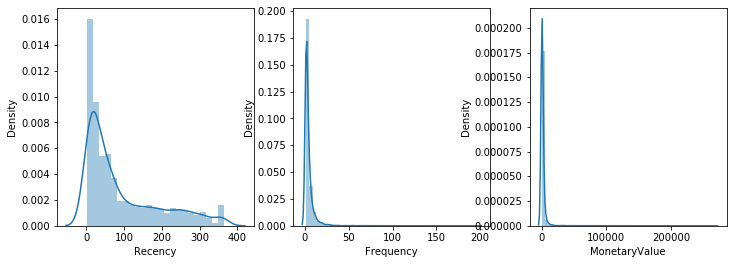

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_brandnew['Recency'], ax = ax[0])
sns.distplot(df_brandnew['Frequency'], ax = ax[1])
sns.distplot(df_brandnew['MonetaryValue'], ax = ax[2])
plt.show()

In [69]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(x, ax=ax[0,0])
    sns.distplot(np.log(x), ax=ax[0,1])
    sns.distplot(np.sqrt(x), ax=ax[1,0])
    sns.distplot(stats.boxcox(x)[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(x.skew().round(2))
    print(np.log(x).skew().round(2))
    print(np.sqrt(x).skew().round(2))
    print(pd.Series(stats.boxcox(x)[0]).skew().round(2))

C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

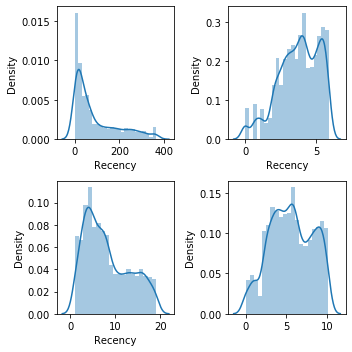

1.21
-0.54
0.58
-0.07


In [70]:
analyze_skewness(df_brandnew['Recency'])

C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZBook\miniconda3\envs\giang_xinh_dep\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

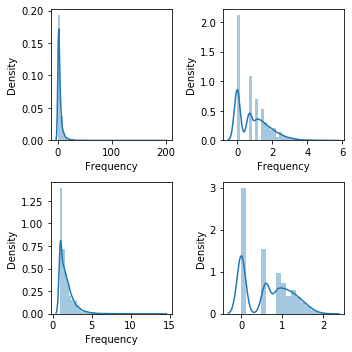

11.9
0.81
3.04
0.16


In [71]:
analyze_skewness(df_brandnew['Frequency'])

In [72]:
df_brandnew.describe()

,Recency,Frequency,MonetaryValue
count,4294.000000,4294.000000,4294.000000
mean,91.619702,4.105496,1915.463335
std,98.728780,7.350739,8269.449404
min,1.000000,1.000000,0.000000
25%,16.000000,1.000000,301.297500
50%,50.000000,2.000000,646.360000
75%,146.000000,4.000000,1569.047500
max,365.000000,197.000000,267410.000000


In [73]:
df_brandnew_tf = pd.DataFrame()
df_brandnew_tf['Recency'] = stats.boxcox(df_brandnew['Recency'])[0]
df_brandnew_tf['Frequency'] = stats.boxcox(df_brandnew['Frequency'])[0]
df_brandnew_tf['MonetaryValue'] = pd.Series(np.cbrt(df_brandnew['MonetaryValue'])).values
df_brandnew_tf.head(10)

,Recency,Frequency,MonetaryValue
0,9.799788,0.000000,42.576995
1,4.670056,1.242559,15.985899
2,6.150585,1.039792,11.285213
3,2.820855,0.000000,11.338123
4,9.670737,0.000000,6.652414
5,4.488694,1.310700,11.148778
6,8.553273,0.000000,4.464745
7,8.898471,0.000000,10.257955
8,8.688927,0.000000,7.716085
9,3.333986,0.872515,13.549303


In [74]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_brandnew_tf2 = scaler.fit_transform(df_brandnew_tf)

In [75]:
df_brandnew_tf2

array([[ 1.60140317, -1.15580518,  6.84712806],
       [-0.34857563,  1.07505039,  1.30552448],
       [ 0.21422198,  0.71100877,  0.32589816],
       ...,
       [ 0.67733802, -1.15580518, -1.05796126],
       [-2.12381646,  1.69471278,  0.52386177],
       [-0.28496182,  0.41068323,  0.5265041 ]])

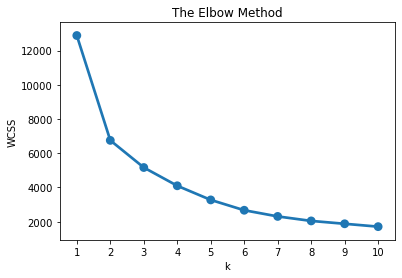

In [76]:
from sklearn.cluster import KMeans

wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_brandnew_tf2)
    wcss[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [77]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_brandnew_tf2)

KMeans(n_clusters=3, random_state=42)

In [78]:
df_brandnew['Cluster'] = model.labels_

In [79]:
df_brandnew.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,17.96,13.84,8632.16
1,160.63,1.25,403.08
2,43.03,3.69,1136.63


In [80]:
df_brandnew.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,317,1,77183.60,0
12347.0,31,6,4085.18,0
12348.0,67,4,1437.24,2
12349.0,10,1,1457.55,2
12350.0,302,1,294.40,1


Loyal customer: Cluster 2 - customer who buy many times with monetary value is high
Negative customer: Cluster 1 - customer buy only once, and the value of order is small
Potential customers : Cluster 0 - customer who did used product of e_commerce before, the moneytary value is mid

In [81]:
df_brandnew.groupby('Cluster').count()

,Recency,Frequency,MonetaryValue
Cluster,,,
0,633,633,633
1,1909,1909,1909
2,1752,1752,1752
